In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

# pmf (probability mass function) 
* for discrete variable's 

In [11]:
import random
L = []
for i in range(1000):
    L.append(random.randint(1,6))

In [9]:
L[:5]

[2, 5, 2, 6, 3]

In [14]:
s=(pd.Series(L).value_counts()/ pd.Series(L).value_counts().sum()).sort_index()
s

1    0.143
2    0.172
3    0.162
4    0.188
5    0.171
6    0.164
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


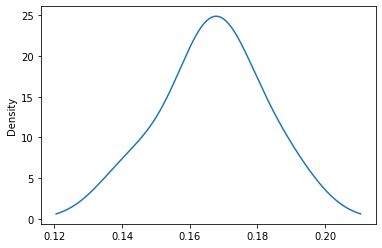

In [18]:
print(s.plot(kind="kde"))


AxesSubplot(0.125,0.125;0.775x0.755)


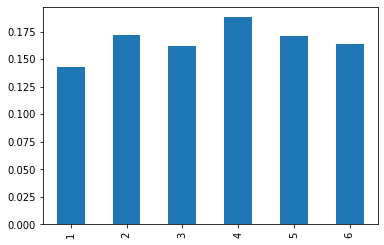

In [19]:
print(s.plot(kind="bar"))


In [20]:
# now roll two 🎲 at a time

In [21]:
import random
M = []
for i in range(1000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    M.append(a+b)

In [23]:
M[:5]

[7, 8, 3, 4, 7]

In [25]:
t= (pd.Series(M).value_counts() / pd.Series(M).value_counts().sum()).sort_index()
t

2     0.025
3     0.069
4     0.104
5     0.103
6     0.131
7     0.162
8     0.130
9     0.113
10    0.089
11    0.047
12    0.027
dtype: float64

<AxesSubplot: >

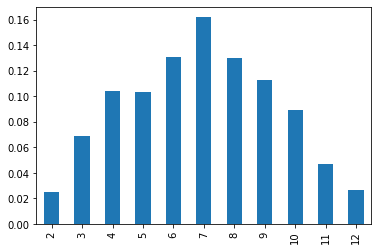

In [26]:
t.plot(kind='bar')

<AxesSubplot: ylabel='Density'>

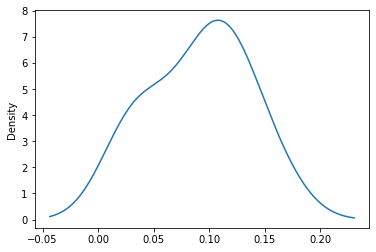

In [28]:
t.plot(kind='kde')


# cdf 

In [29]:
np.cumsum(t)

2     0.025
3     0.094
4     0.198
5     0.301
6     0.432
7     0.594
8     0.724
9     0.837
10    0.926
11    0.973
12    1.000
dtype: float64

<AxesSubplot: >

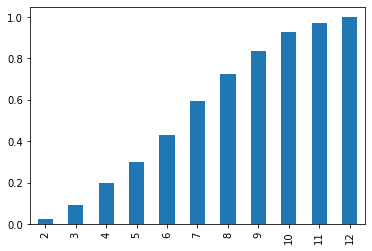

In [30]:
np.cumsum(t).plot(kind="bar")

# pdf (probability density function)
* for continuous variable's 

# parametric

In [31]:
# gengenerate random sample using mean and std
from numpy.random import normal
sample = normal(loc=50, scale=5,size=1000)

(array([  6.,  35.,  69., 153., 226., 193., 177.,  83.,  47.,  11.]),
 array([35.60322315, 38.34060176, 41.07798038, 43.815359  , 46.55273762,
        49.29011624, 52.02749486, 54.76487348, 57.5022521 , 60.23963071,
        62.97700933]),
 <BarContainer object of 10 artists>)

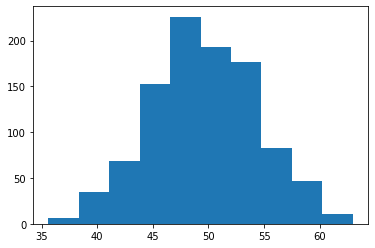

In [35]:
plt.hist(sample,bins=10)

In [36]:
sample_mean = sample.mean()
sample_std =sample.std()
from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [37]:
values = np.linspace(sample.min(),sample.max(),100)

In [39]:
probabilities = [dist.pdf(value) for value in values]

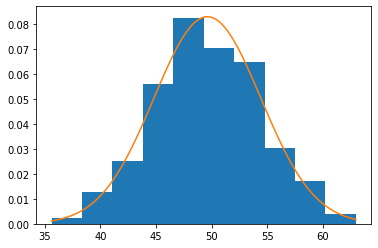

In [50]:
#plot histogram
plt.hist(sample,bins=10,density =True)
plt.plot(values, probabilities)

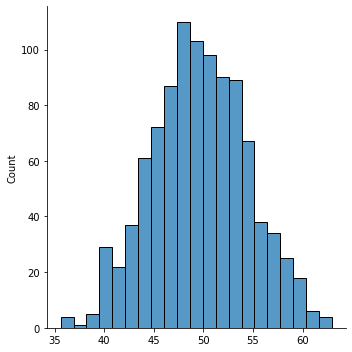

In [53]:
sns.displot(sample)

# non-parametric

    # KDE

In [56]:
sample1= normal(loc=20,scale=5,size=300)
sample2= normal(loc=40,scale=5,size=700)
samples = np.hstack((sample1,sample2))


(array([ 1.,  0.,  4.,  4.,  6.,  4., 10., 13., 16., 13., 22., 27., 17.,
        21., 26., 29., 23., 13., 15., 12.,  9., 11.,  5., 16., 13., 16.,
        22., 35., 35., 47., 39., 53., 50., 60., 49., 52., 36., 37., 36.,
        37., 21., 13., 15.,  4.,  4.,  3.,  3.,  1.,  1.,  1.]),
 array([ 6.40913759,  7.41122604,  8.4133145 ,  9.41540296, 10.41749141,
        11.41957987, 12.42166833, 13.42375679, 14.42584524, 15.4279337 ,
        16.43002216, 17.43211062, 18.43419907, 19.43628753, 20.43837599,
        21.44046445, 22.4425529 , 23.44464136, 24.44672982, 25.44881828,
        26.45090673, 27.45299519, 28.45508365, 29.4571721 , 30.45926056,
        31.46134902, 32.46343748, 33.46552593, 34.46761439, 35.46970285,
        36.47179131, 37.47387976, 38.47596822, 39.47805668, 40.48014514,
        41.48223359, 42.48432205, 43.48641051, 44.48849897, 45.49058742,
        46.49267588, 47.49476434, 48.4968528 , 49.49894125, 50.50102971,
        51.50311817, 52.50520662, 53.50729508, 54.50938354,

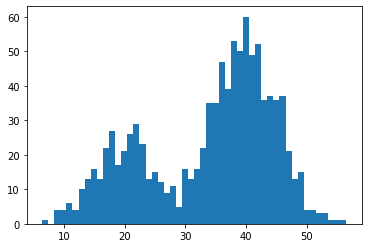

In [57]:
# plot histogram
plt.hist(samples,bins=50)

In [70]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=3,kernel = "gaussian")
#convert data into 2D array
sample = samples.reshape((len(samples),1))
model.fit(sample)


KernelDensity(bandwidth=3)

In [71]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape(len(values),1)

In [72]:
prob = model.score_samples(values)
prob = np.exp(prob)

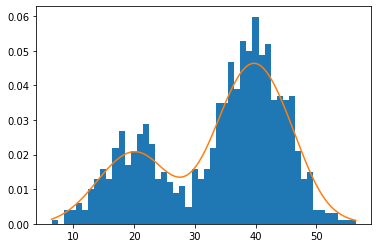

In [73]:
plt.hist(sample, bins=50,density=True)
plt.plot(values[:],prob)
plt.show()

<AxesSubplot: ylabel='Density'>

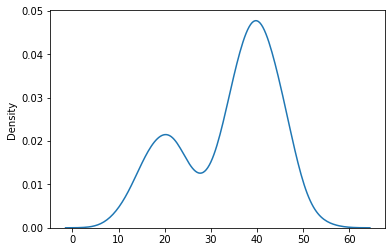

In [80]:
sns.kdeplot(sample.reshape(1000))
#bw_adjust=1